In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["load-graphml" false]
["N-turtles" 80]
["percentage-unhappy" [10 10 40]]
["clear-before-generating" true]
["arduino-on" false]
["mutated" 0]
["links-to-use" "undirected"]
["frac-providers" 0.05 0.05 0.15]



( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["load-graphml" false]\n["N-turtles" 80]\n["percentage-unhappy" [10 10 40]]\n["clear-before-generating" true]\n["arduino-on" false]\n["mutated" 0]\n["links-to-use" "undirected"]\n["frac-providers" 0.05 0.05 0.15]\n\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/CA_5-STATES_NETWORK_CLEAN_55_PERFEITO_SAVE_Block_Arduino_25_PERFECT_DOC_BREED_aligned_BEHAVIOR_work2_SIMILARITY_SEGREGATION_CENTROIDE_work experiment_centroid-table.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       '( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)',
       '( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y'],
      dtype='object')

In [3]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y
0,1,1.5,1,10,0.05,0,2.631579,2.250000,0.095833,0.000000,0.398333,0.0750,0.000000,0.000000
1,3,1.5,1,10,0.15,0,2.808824,2.583333,0.000000,0.000000,0.304167,0.0125,0.000000,0.000000
2,5,1.5,1,20,0.05,0,2.763158,1.500000,0.037500,0.000000,0.262500,0.0000,0.000000,0.000000
3,7,1.5,1,30,0.05,0,2.184211,3.250000,0.075000,0.000000,0.343036,0.1875,0.000000,0.000000
4,2,1.5,1,10,0.05,0,2.723684,1.500000,0.037500,0.000000,0.316667,0.0125,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,105,5.5,5,30,0.15,86,2.191176,3.833333,0.736840,1.646203,0.616916,25.5250,-0.333897,-0.504456
9824,105,5.5,5,30,0.15,87,2.117647,4.333333,0.735542,1.643038,0.618225,25.4000,-0.146397,-0.616956
9825,105,5.5,5,30,0.15,88,2.220588,2.916667,0.736613,1.641139,0.619039,25.3250,-0.021397,-0.391956
9826,105,5.5,5,30,0.15,89,2.073529,4.083333,0.736220,1.639557,0.619701,25.2625,-0.246397,-0.529456


In [4]:
df_move=df4.groupby(['frac-providers','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  \
frac-providers step                                                         
0.05           0         2.359649        2.583333      0.230276  0.000000   
               1         1.780336        3.402778      0.293309  0.816908   
               2         2.146199        3.756944      0.336512  0.877901   
               3         2.101974        4.239583      0.352492  0.839746   
               4         2.157164        2.690972      0.365851  0.955318   
...                           ...             ...           ...       ...   
0.15           86        2.116013        3.189815      0.538104  1.072240   
               87        1.985703        3.518519      0.537758  1.070534   
               88        2.138480        2.414352      0.538951  1.069453   
               89        1.819444        3.050926      0.539066  1.062869   
               90        2.276961        3.259259      0.541471  1.061515   

                     closeness  betweenness  centroid-x  centroid-y  
frac-providers step                                                  
0.05           0      0.327810    57.219444    0.000000    0.000000  
               1      0.299352    66.805729    0.145175    0.093882  
               2      0.308259    70.229167    0.164055    0.077755  
               3      0.310098    67.567535    0.153118    0.073762  
               4      0.308014    72.833854    0.181413    0.062696  
...                        ...          ...         ...         ...  
0.15           86     0.428027    48.494792    0.164056    0.041000  
               87     0.427785    48.549653    0.149820    0.041347  
               88     0.428618    48.449653    0.151903    0.028500  
               89     0.429568    48.301389    0.191833    0.004889  
               90     0.431143    47.969792    0.222736   -0.015945  

[182 rows x 8 columns]

In [5]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [6]:
df_move

mood_clients  mood_providers  cluster_coef     paths  \
frac-providers step                                                         
0.05           0         2.359649        2.583333      0.230276  0.000000   
               1         1.780336        3.402778      0.293309  0.816908   
               2         2.146199        3.756944      0.336512  0.877901   
               3         2.101974        4.239583      0.352492  0.839746   
               4         2.157164        2.690972      0.365851  0.955318   
...                           ...             ...           ...       ...   
0.15           86        2.116013        3.189815      0.538104  1.072240   
               87        1.985703        3.518519      0.537758  1.070534   
               88        2.138480        2.414352      0.538951  1.069453   
               89        1.819444        3.050926      0.539066  1.062869   
               90        2.276961        3.259259      0.541471  1.061515   

                     closeness  betweenness  centroid-x  centroid-y  \
frac-providers step                                                   
0.05           0      0.327810    57.219444    0.000000    0.000000   
               1      0.299352    66.805729    0.145175    0.093882   
               2      0.308259    70.229167    0.164055    0.077755   
               3      0.310098    67.567535    0.153118    0.073762   
               4      0.308014    72.833854    0.181413    0.062696   
...                        ...          ...         ...         ...   
0.15           86     0.428027    48.494792    0.164056    0.041000   
               87     0.427785    48.549653    0.149820    0.041347   
               88     0.428618    48.449653    0.151903    0.028500   
               89     0.429568    48.301389    0.191833    0.004889   
               90     0.431143    47.969792    0.222736   -0.015945   

                     total_mood  
frac-providers step              
0.05           0       4.942982  
               1       5.183114  
               2       5.903143  
               3       6.341557  
               4       4.848136  
...                         ...  
0.15           86      5.305828  
               87      5.504221  
               88      4.552832  
               89      4.870370  
               90      5.536220  

[182 rows x 9 columns]

/tmp/ipykernel_270051/61446366.py:14: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


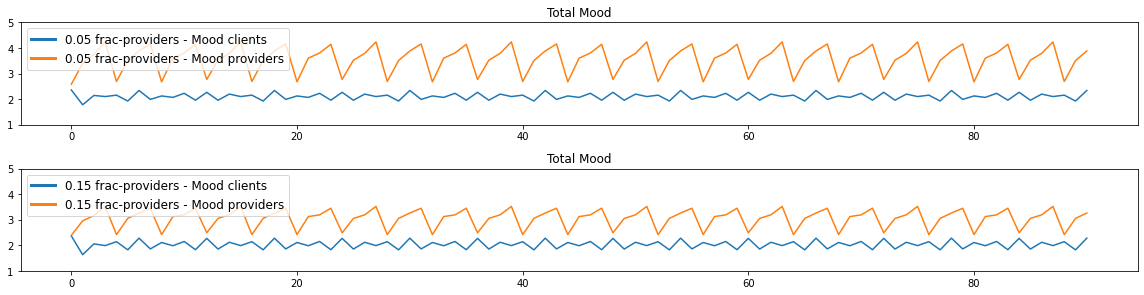

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [ 3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['mood_clients'], label='{} frac-providers - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['mood_providers'], label='{} frac-providers - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



/tmp/ipykernel_270051/2302355802.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


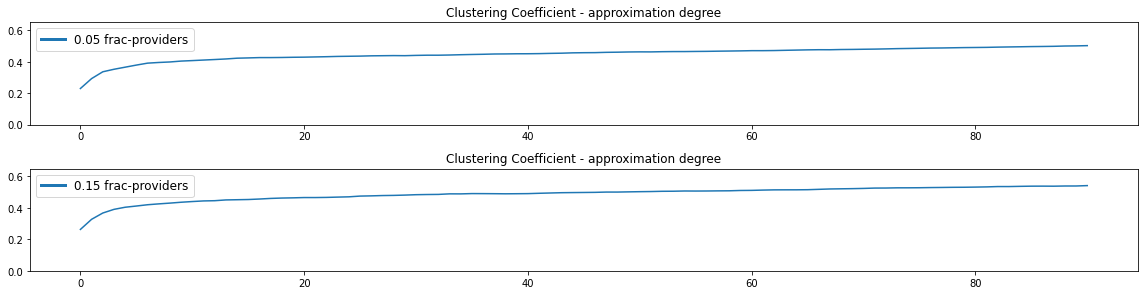

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05, 0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['cluster_coef'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



/tmp/ipykernel_270051/507636111.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


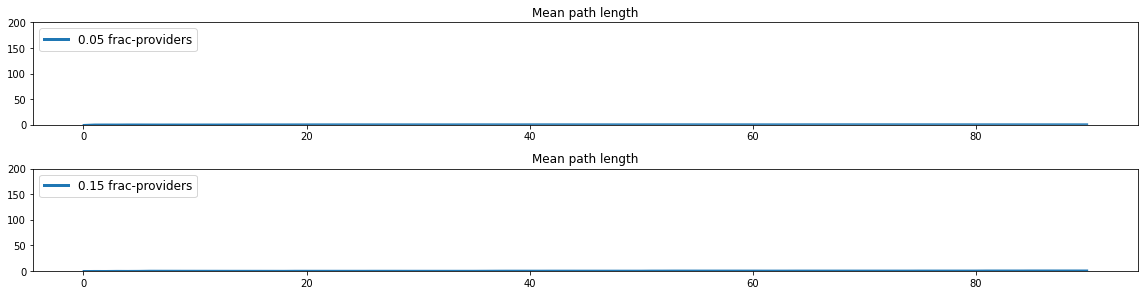

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['paths'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



/tmp/ipykernel_270051/3263416553.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


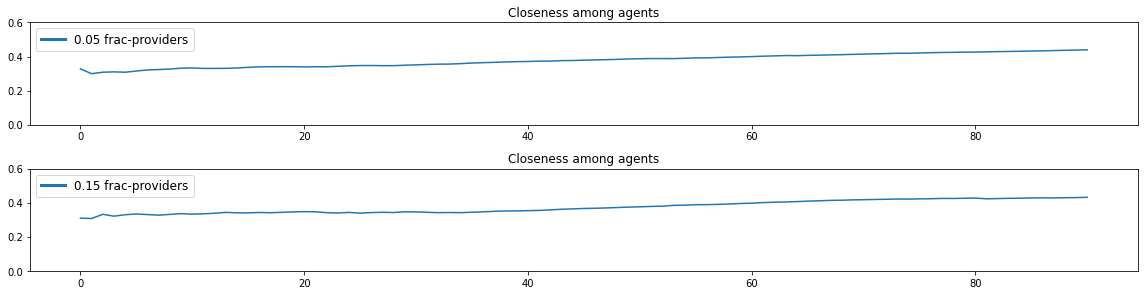

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['closeness'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



/tmp/ipykernel_270051/1763840863.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


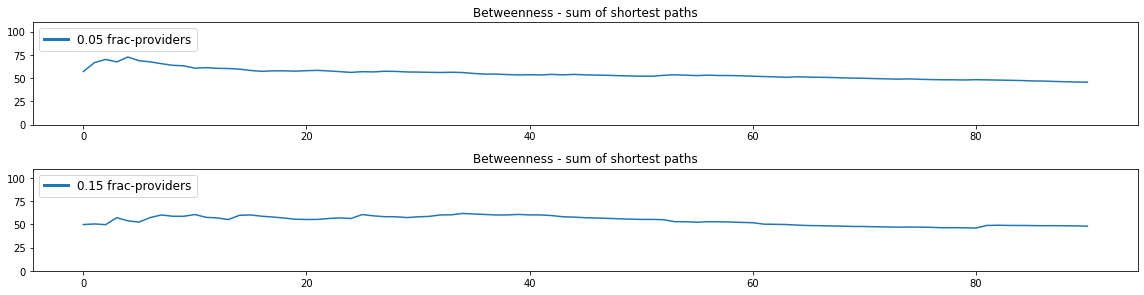

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0.05,0.15]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['frac-providers']==i]['betweenness'], label='{} frac-providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,110)
plt.show()


In [12]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['frac-providers']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['frac-providers']==5].mean()

In [13]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [14]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,3.516,0.0006
1,mood_providers,7.3183,0.0
2,cluster_coef,-5.7567,0.0
3,paths,14.5718,0.0
4,closeness,0.5827,0.5608
5,betweenness,0.8865,0.3766
6,centroid-x,7.4066,0.0
7,centroid-y,-21.4687,0.0
8,total_mood,8.9365,0.0


In [15]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,12.3625,0.0006
1,mood_providers,53.5577,0.0
2,cluster_coef,33.1393,0.0
3,paths,212.337,0.0
4,closeness,0.3395,0.5608
5,betweenness,0.7858,0.3766
6,centroid-x,54.8582,0.0
7,centroid-y,460.9034,0.0
8,total_mood,79.861,0.0


In [16]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



KeyError: 'percentage-unhappy'

In [ ]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients     -0.6624
mood_providers   -0.4342
cluster_coef      0.7970
paths             0.8036
closeness         0.7845
betweenness      -0.6125
total_mood       -0.3487
centroid-x       -0.0714
centroid-y       -0.2436
dtype: float64

In [ ]:
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==1.5].iloc[0:30,2:].shape

(0, 9)

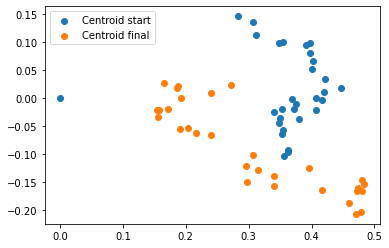

In [ ]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==10].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

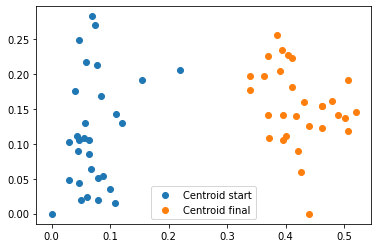

In [ ]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['percentage-unhappy']==40].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [ ]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
percentage-unhappy step                                                       
10                 0           2.7704          2.2840        0.2378  0.0000   
                   1           1.9757          1.6265        0.2971  0.6716   
                   2           2.4731          2.0648        0.3359  0.7860   
                   3           2.3411          1.9506        0.3533  1.1591   
                   4           2.5258          2.0031        0.3705  1.0234   
...                               ...             ...           ...     ...   
40                 86          1.7520          5.6451        0.5249  0.8497   
                   87          1.6268          6.7562        0.5248  0.8475   
                   88          1.7209          3.4599        0.5253  0.8456   
                   89          1.5007          5.5463        0.5255  0.8421   
                   90          1.8555          5.7222        0.5282  0.8407   

                         closeness  betweenness  centroid-x  centroid-y  \
percentage-unhappy step                                                   
10                 0        0.3294      59.2968      0.0000      0.0000   
                   1        0.3036      62.6704      0.2834      0.1461   
                   2        0.3262      67.8995      0.3067      0.1359   
                   3        0.3124      71.6153      0.3122      0.1128   
                   4        0.3177      67.9060      0.3484      0.0983   
...                            ...          ...         ...         ...   
40                 86       0.4279      49.0245      0.4108      0.1820   
                   87       0.4308      48.1565      0.3951      0.1422   
                   88       0.4321      47.8097      0.4220      0.0904   
                   89       0.4329      47.8176      0.4257      0.0593   
                   90       0.4346      47.5741      0.4395     -0.0004   

                         total_mood  
percentage-unhappy step              
10                 0         5.0543  
                   1         3.6022  
                   2         4.5379  
                   3         4.2917  
                   4         4.5289  
...                             ...  
40                 86        7.3971  
                   87        8.3830  
                   88        5.1808  
                   89        7.0470  
                   90        7.5777  

[364 rows x 9 columns]

/tmp/ipykernel_270051/1869904554.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


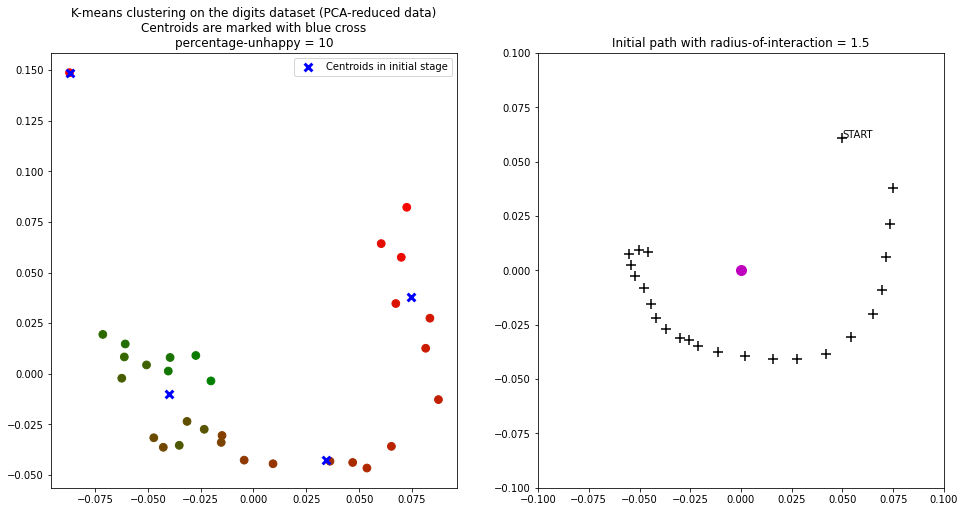

In [26]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [ ]:
df_move.reset_index().loc[df_move.reset_index()['frac-providers']==1].shape

(0, 11)

/tmp/ipykernel_270051/3498061775.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


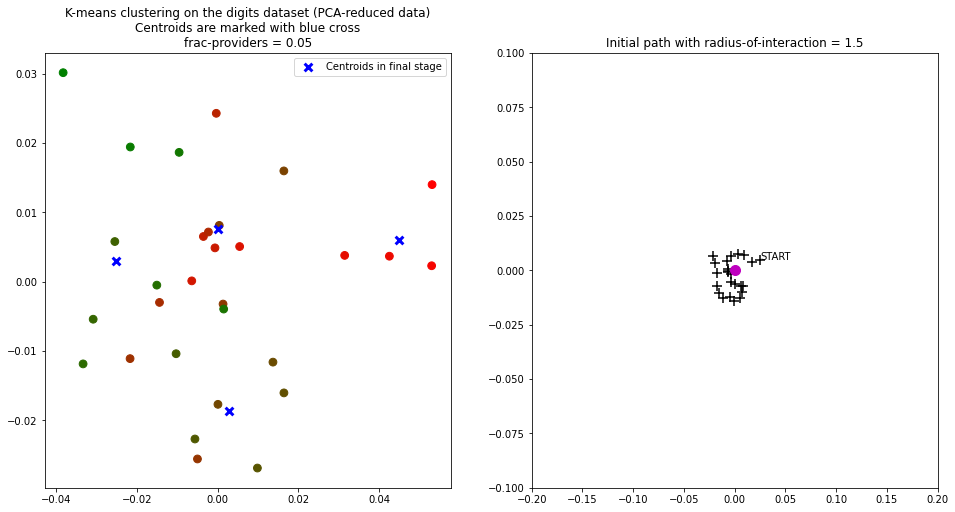

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "frac-providers = 0.05"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [18]:
lag=7


/tmp/ipykernel_270051/3356074056.py:44: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


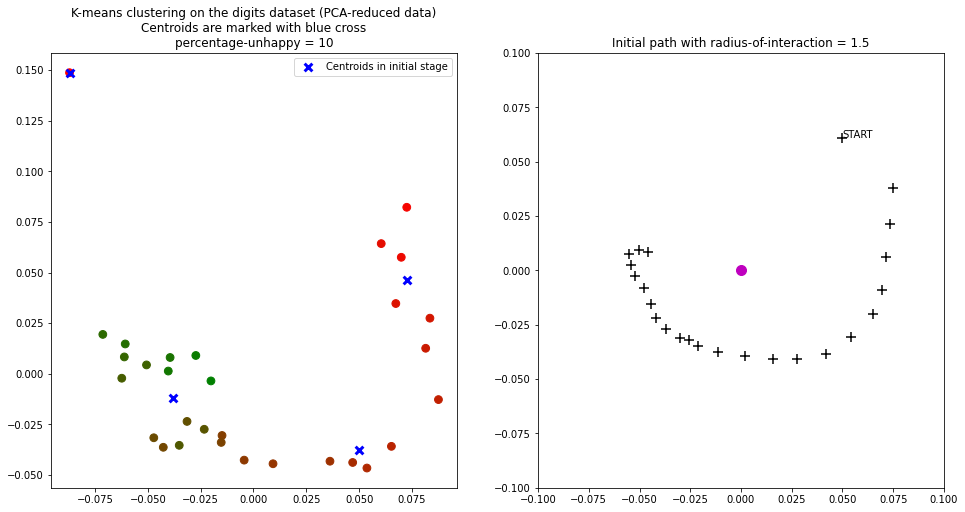

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.05].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "percentage-unhappy = 10"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_270051/4279043870.py:43: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


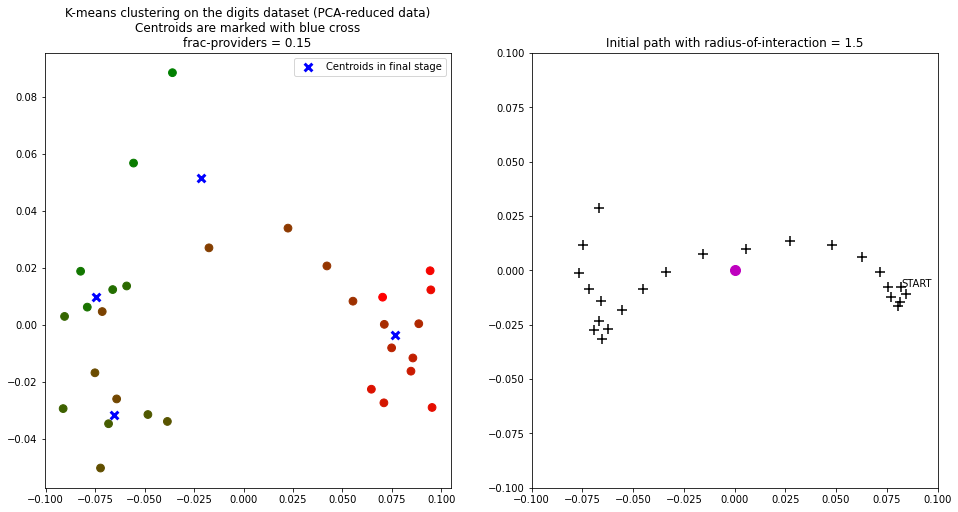

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['frac-providers']==0.15].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "frac-providers = 0.15"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()